In [ ]:
import pandas as pd

#load tables stated above
test_microbial_abundance_pivot = pd.read_csv('taxonomic_abundance.txt',sep='\t' )

# typical microbiome dataframe where columns are variable (taxa) realative abundance and rows/index are sample_id and region 


# if for some reason your output has each row a sample ,a single taxa and the relative abundace of that taxa we will organize
# and pivot that datafram
test_microbial_abundance_pivot = test_microbial_abundance_pivot.pivot(index = ['sampleid','region'],columns = 'asv_id',values = 'asv_count').fillna(0)


### 1. What is the difference between PCA and PCoA?
PCA - Principal Components Ananlysis
PCoA - Principal coordinates analysis

Both are dimentional reduction techniques. PCA uses Eucledian distances and is used for quantitative variables (counts). This in turn makes it easier to determine which specific features are most contributing to which PC direction. PCoA is typically used to represent (dis)similarity matrices whic can be calculated a number of ways (BrayCurtis, Jaccard, Unifrac) using a variaty of variables (quantitative, qualitative, and mixed).

### 2. For the purpose of this test:
a) Normalize the microbial counts and run PCA on the microbiome data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skbio.stats.composition import multiplicative_replacement
from skbio.stats.composition import clr
from sklearn.decomposition import PCA
%matplotlib inline


# a) Normalize the microbial counts and run PCA on the microbiome data.
def clr_df(df):
    clr_np = clr(multiplicative_replacement(df))
    df_clr = pd.DataFrame(clr_np,index=df.index,columns=df.columns)
    return df_clr


###  b) Generate a 2D PCA plot with the first two principal components, color points by the geographical location (region column).


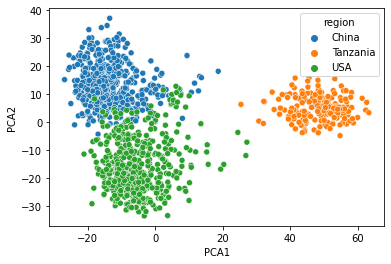

In [419]:
# clr normaliozation with multiplicative replacement
microbial_abun_clr = clr_df(test_microbial_abundance_pivot)

# do pca plot
pca = PCA(n_components=2)  #just focusing on the first 2 components
pc =  pca.fit_transform(microbial_abun_clr)
plot_df = pd.DataFrame(data = pc, columns = ['PCA1', 'PCA2'], index = microbial_abun_clr.index)

sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'region', data = plot_df)

### c) What are the top 5 microbes (in terms of ASV IDs) that contribute the most to the first two principal components?

In [246]:
# get the contribution of each ASV to its respective PCA components
featimp = pd.DataFrame(pca.components_,columns=microbial_abun_clr.columns,index = ['PC-1','PC-2'])

#transpose that df above and get absolute numbers for all. Idea is that negative and positive 
# eigenvalues simply tell you the direction of a given variable on the dimension vector. Since
# we are not interested in the direction but the total separation then gettign absolute for 
# PC1 and PC2 and summing the totals seems like the best approach. 
featimp_ta = featimp.transpose().abs()

# In order to see  What are the top 5 microbes (in terms of ASV IDs) that contribute the most to the first 
# two principal components
merged = featimp_t['PC-1']+featimp_t['PC-2']
merged.sort_values(ascending=False)[:5]

asv_id
asv_1448       0.286421
asv_4          0.262757
asv_48         0.249722
asv_796        0.231966
asv_1013461    0.225226
dtype: float64